In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['text.usetex'] = True

In [2]:
h10 = {
    "koopman": {
        "train": [4.779674053192139, 2.7271478176116943, 2.9460301399230957, 3.31054425239563, 3.135464906692505, 3.233924627304077, 3.737001657485962, 3.924687623977661, 4.285128116607666, 4.896482706069946],
        "infer": [0.3134334087371826, 0.3985917568206787, 0.34282493591308594, 0.2964498996734619, 0.3803989887237549, 0.37729883193969727, 0.301865816116333, 0.3622739315032959, 0.3727996349334717, 0.4537169933319092]
    },
    "rnn": {
        "train": [2.603893756866455, 0.35364818572998047, 0.4164917469024658, 0.42455005645751953, 0.3880729675292969, 0.3670799732208252, 0.3927490711212158, 0.38985204696655273, 0.39105892181396484, 0.3713538646697998],
        "infer": [0.010353565216064453, 0.009846687316894531, 0.009724140167236328, 0.009647369384765625, 0.00960993766784668, 0.009485960006713867, 0.010303020477294922, 0.01024317741394043, 0.00985407829284668, 0.010033369064331055]
    },
    "reflex": {
        "train": [1.8656294345855713, 0.0753018856048584, 0.07225775718688965, 0.09401726722717285, 0.12689590454101562, 0.07386302947998047, 0.1200108528137207, 0.12194204330444336, 0.07940101623535156, 0.07378959655761719],
        "infer": [0.002093076705932617, 0.0016565322875976562, 0.0021550655364990234, 0.0017533302307128906, 0.001720428466796875, 0.0016751289367675781, 0.0016300678253173828, 0.0016870498657226562, 0.0016505718231201172, 0.0017235279083251953]
    },
    "cyin": {
        "train": [3.2110331058502197, 1.270247459411621, 1.3623099327087402, 1.1074566841125488, 1.317047119140625, 1.1884257793426514, 1.5185699462890625, 1.3319885730743408, 1.3440372943878174, 1.25803542137146],
        "infer": [0.02246236801147461, 0.03410744667053223, 0.02092146873474121, 0.02495288848876953, 0.022350311279296875, 0.02095818519592285, 0.020421981811523438, 0.021271467208862305, 0.023552417755126953, 0.027216672897338867]
    }
}

h20 = {
    "koopman": {
        "train": [10.266776323318481, 10.952387571334839, 10.733768939971924, 12.181357622146606, 12.398614406585693, 12.300835132598877, 12.421929597854614, 12.4301278591156, 10.945276737213135, 12.33874249458313],
        "infer": [1.0488777160644531, 1.0318992137908936, 1.2650980949401855, 1.3452024459838867, 1.0969433784484863, 1.5786447525024414, 1.1997957229614258, 1.2674634456634521, 1.0159943103790283, 1.2965636253356934]
    },
    "rnn": {
        "train": [5.017014980316162, 0.6437451839447021, 0.6544826030731201, 0.7134201526641846, 0.7259464263916016, 0.6117806434631348, 0.7086565494537354, 0.8157744407653809, 0.7103004455566406, 0.6668047904968262],
        "infer": [0.024918556213378906, 0.029378652572631836, 0.03747272491455078, 0.028362274169921875, 0.027591705322265625, 0.022797107696533203, 0.025671005249023438, 0.028809309005737305, 0.02881789207458496, 0.028728723526000977]
    },
    "reflex": {
        "train": [2.042452335357666, 0.09210085868835449, 0.08116579055786133, 0.07837557792663574, 0.09552621841430664, 0.06574058532714844, 0.08968424797058105, 0.07595443725585938, 0.09659457206726074, 0.09284472465515137],
        "infer": [0.0020613670349121094, 0.0015025138854980469, 0.0014967918395996094, 0.0014424324035644531, 0.0013680458068847656, 0.0013437271118164062, 0.0013816356658935547, 0.0014567375183105469, 0.001360177993774414, 0.0013413429260253906]
    },
    "cyin": {
        "train": [1.6287741661071777, 1.3362650871276855, 1.3928403854370117, 1.168846607208252, 1.1990687847137451, 1.3433475494384766, 1.2659964561462402, 1.4219019412994385, 1.3531677722930908, 1.3473031520843506],
        "infer": [0.032375335693359375, 0.030330181121826172, 0.030533790588378906, 0.030735015869140625, 0.03037095069885254, 0.030215978622436523, 0.030205965042114258, 0.030774593353271484, 0.0436859130859375, 0.03247666358947754]
    }
}

In [3]:
def plot(data, ylim, horizon="10"):
    import matplotlib as mpl
    mpl.rcParams.update(mpl.rcParamsDefault)

    method_names = ["Training", "Inference"]

    results = []
    for type_ in ["train", "infer"]:
        results.append(data["koopman"][type_])
    print(results)
    kcpo_df = pd.DataFrame(np.array(results).T, columns=method_names)

    results = []
    for type_ in ["train", "infer"]:
        results.append(data["rnn"][type_])
    rnn_df = pd.DataFrame(np.array(results).T, columns=method_names)
    
    results = []
    for type_ in ["train", "infer"]:
        results.append(data["reflex"][type_])
    reflex_df = pd.DataFrame(np.array(results).T, columns=method_names)
    
    results = []
    for type_ in ["train", "infer"]:
        results.append(data["cyin"][type_])
    cyin_df = pd.DataFrame(np.array(results).T, columns=method_names)

    # print(in_df)
    # print(out_df)

    pal = sns.color_palette("Set1")

    # Create the figure
    fig, (first, second, third, fourth) = plt.subplots(1, 4, figsize=(10, 3))

    first.set_title("KCPO", size=15)
    first.set_yscale("log")
    first.set_ylim(ylim)
    first.set_ylabel("Seconds", size=15)
    first.axhline(y=1, color="black", linewidth=4, linestyle="-")
    bp = sns.boxplot(data=kcpo_df, palette=pal, ax=first)

    second.set_title("RNN", size=15)
    second.set_yscale("log")
    second.set_ylim(ylim)
    second.axhline(y=1, color="black", linewidth=4, linestyle="-")
    bp = sns.boxplot(data=rnn_df, palette=pal, ax=second)
    
    third.set_title("ReflexNet", size=15)
    third.set_yscale("log")
    third.set_ylim(ylim)
    third.axhline(y=1, color="black", linewidth=4, linestyle="-")
    bp = sns.boxplot(data=rnn_df, palette=pal, ax=third)
    
    fourth.set_title("RiccatiNet", size=15)
    fourth.set_yscale("log")
    fourth.set_ylim(ylim)
    fourth.axhline(y=1, color="black", linewidth=4, linestyle="-")
    bp = sns.boxplot(data=cyin_df, palette=pal, ax=fourth)
    
    plt.tight_layout()

    plt.savefig(f"./timing_figures/timing-horizon-{horizon}.pdf", transparent=True, bbox_inches='tight', pad_inches=0)

    plt.show()

[[4.779674053192139, 2.7271478176116943, 2.9460301399230957, 3.31054425239563, 3.135464906692505, 3.233924627304077, 3.737001657485962, 3.924687623977661, 4.285128116607666, 4.896482706069946], [0.3134334087371826, 0.3985917568206787, 0.34282493591308594, 0.2964498996734619, 0.3803989887237549, 0.37729883193969727, 0.301865816116333, 0.3622739315032959, 0.3727996349334717, 0.4537169933319092]]


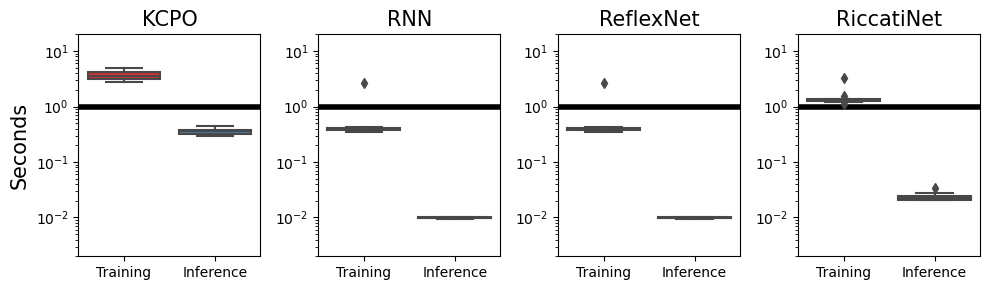

In [4]:
data = h10
horizon = "10"
ylim = [2*10**-3,2*10**1]

plot(data, ylim, horizon)

In [5]:
sns.set_theme(style="white")
pal = sns.color_palette("Set1")
print(pal)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['figure.dpi'] = 300

def plot2(data, ylim, horizon="10", inference_only=True):
#     method_names = ["Training", "Inference"]
    method_names = ["KCPO", "RNN", "ReflexNet", "RiccatiNet"]

    results = []
    for type_ in ["koopman", "rnn", "reflex", "cyin"]:
        results.append(data[type_]["train"])
    print(results)
    train_df = pd.DataFrame(np.array(results).T, columns=method_names)
    
    results = []
    for type_ in ["koopman", "rnn", "reflex", "cyin"]:
        results.append(data[type_]["infer"])
    print(results)
    infer_df = pd.DataFrame(np.array(results).T, columns=method_names)

    # Create the figure
    if inference_only:
        fig, ax = plt.subplots(1, 1, figsize=(2, 3))

        ax.set_title("Inference Time", size=8)
        ax.set_ylabel("Seconds", size=8)
        ax.set_yscale("log")
        ax.set_ylim(ylim)
        ax.axhline(y=1, color="black", linewidth=2, linestyle="--")
        plt.xticks(rotation=45, ha="right")
        bp = sns.barplot(data=infer_df, palette=pal, ax=ax)
        plt.tick_params(axis='y', labelsize=6)
        plt.tick_params(axis='x', labelsize=8)
    else:
        fig, (first, second) = plt.subplots(1, 2, figsize=(8, 7), dpi=300)

        first.set_title("Train", size=15)
        first.set_yscale("log")
        first.set_ylim(ylim)
        first.set_ylabel("Seconds", size=15)
        first.axhline(y=1, color="black", linewidth=4, linestyle="-")
        bp = sns.barplot(data=train_df, palette=pal, ax=first)

        second.set_title("Inference", size=15)
        second.set_yscale("log")
        second.set_ylim(ylim)
        second.axhline(y=1, color="black", linewidth=4, linestyle="-")
        bp = sns.barplot(data=infer_df, palette=pal, ax=second)
        second.get_yaxis().set_visible(False)
    
    plt.tight_layout()

    plt.savefig(f"./timing_figures/timing-horizon-{horizon}.pdf", transparent=True, bbox_inches='tight', pad_inches=0)

    plt.show()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.596078431372549, 0.3058823529411765, 0.6392156862745098), (1.0, 0.4980392156862745, 0.0), (1.0, 1.0, 0.2), (0.6509803921568628, 0.33725490196078434, 0.1568627450980392), (0.9686274509803922, 0.5058823529411764, 0.7490196078431373), (0.6, 0.6, 0.6)]


In [6]:
pal = sns.color_palette("Set1")

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['figure.dpi'] = 300

def plot2(data, ylim, horizon="10", inference_only=True):
#     method_names = ["Training", "Inference"]
    method_names = ["KCPO", "RNN", "ReflexNet", "RiccatiNet"]

    results = []
    for type_ in ["koopman", "rnn", "reflex", "cyin"]:
        results.append(data[type_]["train"])
    print(results)
    train_df = pd.DataFrame(np.array(results).T, columns=method_names)
    
    results = []
    for type_ in ["koopman", "rnn", "reflex", "cyin"]:
        results.append(data[type_]["infer"])
    print(results)
    infer_df = pd.DataFrame(np.array(results).T, columns=method_names)

    # Create the figure
    fig, ax = plt.subplots(1, 1, figsize=(8, 17))

    ax.set_title("Inference Time", size=50)
    ax.set_ylabel("Seconds", size=40)
    ax.set_yscale("log")
    ax.set_ylim(ylim)
    ax.axhline(y=1, color="black", linewidth=2, linestyle="--")
    plt.xticks(rotation=45, ha="right")
    bp = sns.barplot(data=infer_df, palette=pal, ax=ax)
    plt.tick_params(axis='y', labelsize=30)
    plt.tick_params(axis='x', labelsize=40)

    plt.tight_layout()

    plt.savefig(f"./timing_figures/timing-horizon-{horizon}.pdf", transparent=True, bbox_inches='tight', pad_inches=0)

    plt.show()

In [5]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.offline as pyo

def plotly_plot2(data, ylim, horizon="10", inference_only=True):
    method_names = ["KCPO", "RNN", "ReflexNet", "RiccatiNet"]
    colors = px.colors.qualitative.Set1  # Using Set1 color scheme from Seaborn

    results = []
    for type_ in ["koopman", "rnn", "reflex", "cyin"]:
        results.append(data[type_]["train"])
    print(results)
    train_df = pd.DataFrame(np.array(results).T, columns=method_names)
    
    results = []
    for type_ in ["koopman", "rnn", "reflex", "cyin"]:
        results.append(data[type_]["infer"])
    print(results)
    infer_df = pd.DataFrame(np.array(results).T, columns=method_names)

    # Create the figure
    fig = go.Figure()

    # Add bars to the figure
    for i, method in enumerate(method_names):
        fig.add_trace(go.Bar(x=[method], 
                             y=[infer_df[method].mean()] if inference_only else [train_df[method].mean()],
                             name=method, 
                             marker_color=colors[i], showlegend=False))

    # Add line to the figure
    fig.add_shape(type="line",
                  x0=-0.5, y0=1, x1=3.5, y1=1,
                  line=dict(color="Black",width=2, dash="dash")
    )

    # Update layout
    fig.update_layout(
        title_text="Inference Time" if inference_,
        title_x=0.5,
        title_font=dict(size=50),
        yaxis_type="log",
        yaxis_range=[np.log10(ylim[0]), np.log10(ylim[1])],
        yaxis_title="Seconds",
        yaxis_title_font=dict(size=40),
        yaxis_tickfont_size=30,
        xaxis_tickfont_size=40,
        autosize=False,
        width=500,
        height=1200,
        bargap=0.1, # gap between bars of adjacent location coordinates
        bargroupgap=0.1 # gap between bars of the same location coordinate
    )

    # Show figure
    fig.show()
    
    div_str = pyo.plot(fig, output_type="div", include_plotlyjs=False)
    print(div_str)

In [14]:
data = h10
horizon = "10"
# ylim = [2*10**-4,2*10**1]
ylim = [10**-4,10**1]

# plot2(data, ylim, horizon)
plotly_plot2(data, ylim, horizon, inference_only=True)

[[4.779674053192139, 2.7271478176116943, 2.9460301399230957, 3.31054425239563, 3.135464906692505, 3.233924627304077, 3.737001657485962, 3.924687623977661, 4.285128116607666, 4.896482706069946], [2.603893756866455, 0.35364818572998047, 0.4164917469024658, 0.42455005645751953, 0.3880729675292969, 0.3670799732208252, 0.3927490711212158, 0.38985204696655273, 0.39105892181396484, 0.3713538646697998], [1.8656294345855713, 0.0753018856048584, 0.07225775718688965, 0.09401726722717285, 0.12689590454101562, 0.07386302947998047, 0.1200108528137207, 0.12194204330444336, 0.07940101623535156, 0.07378959655761719], [3.2110331058502197, 1.270247459411621, 1.3623099327087402, 1.1074566841125488, 1.317047119140625, 1.1884257793426514, 1.5185699462890625, 1.3319885730743408, 1.3440372943878174, 1.25803542137146]]
[[0.3134334087371826, 0.3985917568206787, 0.34282493591308594, 0.2964498996734619, 0.3803989887237549, 0.37729883193969727, 0.301865816116333, 0.3622739315032959, 0.3727996349334717, 0.453716993

<div>                            <div id="f3a19cba-9a89-4c13-8152-f63313ec4c48" class="plotly-graph-div" style="height:1300px; width:500px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("f3a19cba-9a89-4c13-8152-f63313ec4c48")) {                    Plotly.newPlot(                        "f3a19cba-9a89-4c13-8152-f63313ec4c48",                        [{"marker":{"color":"rgb(228,26,28)"},"name":"KCPO","showlegend":false,"x":["KCPO"],"y":[0.3599654197692871],"type":"bar"},{"marker":{"color":"rgb(55,126,184)"},"name":"RNN","showlegend":false,"x":["RNN"],"y":[0.009910130500793457],"type":"bar"},{"marker":{"color":"rgb(77,175,74)"},"name":"ReflexNet","showlegend":false,"x":["ReflexNet"],"y":[0.0017744779586791992],"type":"bar"},{"marker":{"color":"rgb(152,78,163)"},"name":"RiccatiNet","showlegend":false,"x":["RiccatiNet"],"y":[0.023821520805358886],"t